In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
# Load pre-trained MobileNet without the top classification layer
base_model = MobileNet(weights='imagenet', include_top=False)

C:\Users\Famille\AppData\Local\Temp\ipykernel_6984\3831432045.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step


In [3]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [4]:
# Add a new classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [5]:
# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)


In [6]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Define paths to your train, validation, and test data
train_data_dir = 'C:/Users/Famille/Desktop/data/train'
validation_data_dir = 'C:/Users/Famille/Desktop/data/valid'
test_data_dir = 'C:/Users/Famille/Desktop/data/test'

In [13]:
# Define image dimensions
img_width, img_height = 224, 224

In [10]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255, # image pixels from [0,255] ====> [0,1]
    rotation_range=20, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest' # Startegy to fill empty pixels after shifting or rotation
)

In [11]:
# Data augmentation for validation and test data
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [14]:
# Data generators
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1002 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [15]:
# Train the model
model.fit(  
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10


C:\Users\Famille\PycharmProjects\flaskProject1\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5908 - loss: 1.2575 - val_accuracy: 0.5312 - val_loss: 0.7611
Epoch 2/10
 1/31 ━━━━━━━━━━━━━━━━━━━━ 26s 870ms/step - accuracy: 0.4375 - loss: 0.9679

C:\Users\Famille\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4375 - loss: 0.4996 - val_accuracy: 1.0000 - val_loss: 0.0986
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6226 - loss: 0.6747 - val_accuracy: 0.7292 - val_loss: 0.5504
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7188 - loss: 0.2640 - val_accuracy: 1.0000 - val_loss: 0.1452
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 32s 946ms/step - accuracy: 0.6979 - loss: 0.5422 - val_accuracy: 0.6667 - val_loss: 0.6115
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6562 - loss: 0.3208 - val_accuracy: 0.7500 - val_loss: 0.1679
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 32s 962ms/step - accuracy: 0.7049 - loss: 0.5517 - val_accuracy: 0.7812 - val_loss: 0.4918
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6562 - loss: 0.2544 - val_accuracy: 0.5000 - val_loss: 0.3195
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 33s 959ms/step - accuracy: 0.7326 - loss: 0.5401 - val_accuracy: 0.7188 - val_loss: 

In [16]:
# Evaluate the model
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)

Found 300 images belonging to 2 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 621ms/step - accuracy: 0.7719 - loss: 0.4737
Test Accuracy: 0.7266666889190674


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size, 
    shuffle=False,  
    class_mode='binary'
)

Found 300 images belonging to 2 classes.


In [18]:
# Predict on test data
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = predictions > 0.6  # threshold

C:\Users\Famille\PycharmProjects\flaskProject1\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 708ms/step


In [19]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

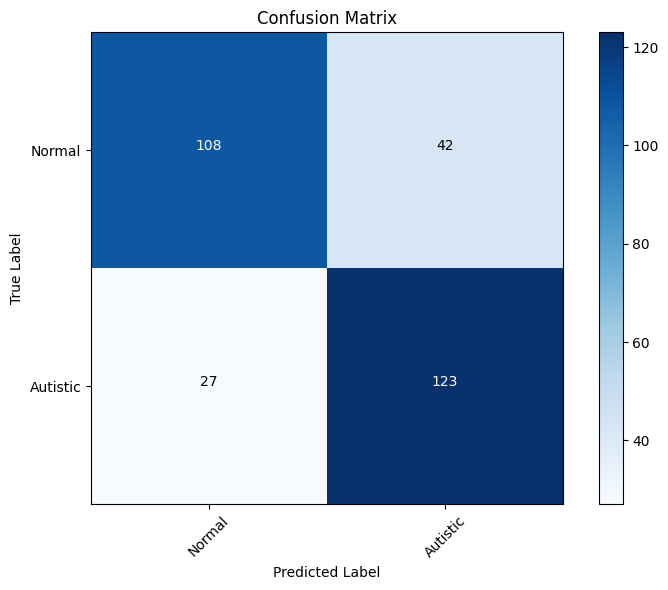

In [20]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Autistic'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Autistic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Text annotations
thresh = conf_matrix.max() / 2.
for i, j in ((i, j) for i in range(conf_matrix.shape[0]) for j in range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [21]:
# Extract true negatives, false positives, false negatives, true positives
tn, fp, fn, tp = conf_matrix.ravel()
# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.82
Specificity (True Negative Rate): 0.72
